In [10]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np


In [11]:
imdv_reviews=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [12]:
imdv_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.4 MB/s 


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [15]:
def sentiment_analyzer_scores(sentence):
  score=analyzer.polarity_scores(sentence)
  print("{:-<40} {}".format(sentence,str(score)))


In [16]:
sentiment_analyzer_scores("I am very happy today")

I am very happy today------------------- {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6115}


In [17]:
sentiment_analyzer_scores("An amazing food i had")

An amazing food i had------------------- {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}


In [18]:
## Effect of punctuations !!
sentiment_analyzer_scores("Today is super cool")
sentiment_analyzer_scores("Today is super cool!")
sentiment_analyzer_scores("Today is super cool!!!")

Today is super cool--------------------- {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.7351}
Today is super cool!-------------------- {'neg': 0.0, 'neu': 0.236, 'pos': 0.764, 'compound': 0.7574}
Today is super cool!!!------------------ {'neg': 0.0, 'neu': 0.22, 'pos': 0.78, 'compound': 0.795}


In [19]:
## Effect of Capitalization
sentiment_analyzer_scores("Today is super cool")
sentiment_analyzer_scores("Today is super COOL!!")

Today is super cool--------------------- {'neg': 0.0, 'neu': 0.244, 'pos': 0.756, 'compound': 0.7351}
Today is super COOL!!------------------- {'neg': 0.0, 'neu': 0.21, 'pos': 0.79, 'compound': 0.8185}


In [20]:
## Effect of degree modifiers
sentiment_analyzer_scores("Bank service here is good")
sentiment_analyzer_scores("Bank service here is moderately good")
sentiment_analyzer_scores("Bank service here is extremely good")

Bank service here is good--------------- {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
Bank service here is moderately good---- {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
Bank service here is extremely good----- {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}


In [21]:
## Effect of conjuctions
sentiment_analyzer_scores("food here is extremely good but service is horrible")

food here is extremely good but service is horrible {'neg': 0.343, 'neu': 0.506, 'pos': 0.151, 'compound': -0.5652}


In [22]:
## Effect of emoticons
sentiment_analyzer_scores("Bank service here is :D")

Bank service here is :D----------------- {'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.6166}


In [23]:
scores=[]
sentences=["A really bad,worst movie to watch","I hate this movie"]
for i in sentences:
  sc=analyzer.polarity_scores(i)
  scores.append(sc)
# Converting list of dictionaries into dataframes
dataframe=pd.DataFrame(scores)
print(dataframe)
print(dataframe.mean())

     neg    neu  pos  compound
0  0.000  1.000  0.0    0.0000
1  0.552  0.448  0.0   -0.5719
neg         0.27600
neu         0.72400
pos         0.00000
compound   -0.28595
dtype: float64


In [24]:
df=pd.read_csv("/content/drive/MyDrive/Reviews.csv")

In [25]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [27]:
df.describe

<bound method NDFrame.describe of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulne

In [28]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [29]:
df['Summary'].values[0]

'Good Quality Dog Food'

In [30]:
df['Text'].values[5]

'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.'

In [31]:
df["Summary"].values[5]

'Nice Taffy'

In [32]:
df.shape

(568454, 10)

In [33]:
df=df.head(500)
df.shape

(500, 10)

In [34]:
## QUICK EDA
df['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

In [35]:
df['Score'].value_counts().sort_index()

1     36
2     18
3     37
4     70
5    339
Name: Score, dtype: int64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

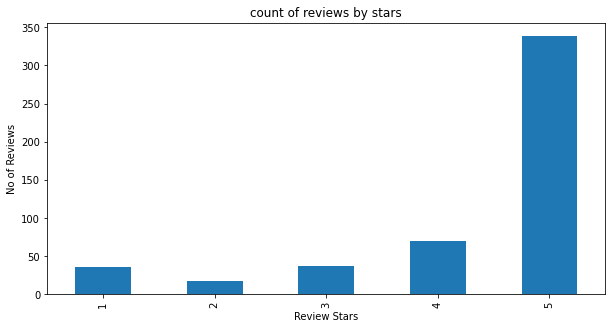

In [37]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='count of reviews by stars',figsize=(10,5))
ax.set_xlabel("Review Stars")
ax.set_ylabel("No of Reviews")
plt.show()

In [38]:
import nltk

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
example=df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [41]:
print(nltk.word_tokenize(example))

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [42]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [43]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [44]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [45]:
 nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [46]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [47]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [51]:
sia.polarity_scores("i am so happy !")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [52]:
sia.polarity_scores("This is the worst ever.")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [53]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [54]:
## Run the polarity score on the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Text']
  myid=row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [55]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [56]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


In [57]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [58]:
# collect sentiment score with metadata
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [59]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


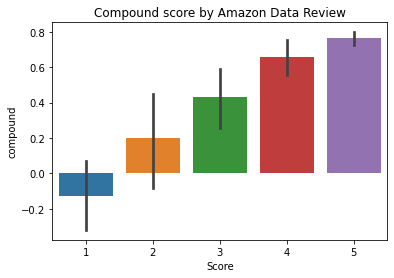

In [60]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title("Compound score by Amazon Data Review")
plt.show()

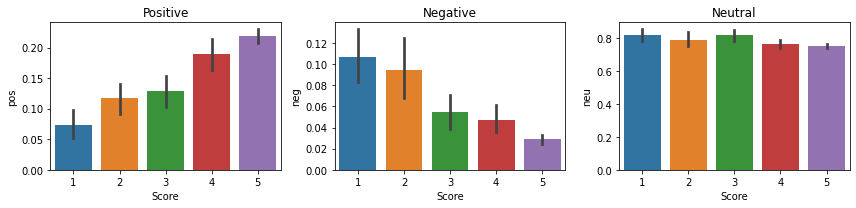

In [61]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()


In [62]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from transformers import AutoTokenizer

In [64]:
from transformers import AutoModelForSequenceClassification

In [65]:
from scipy.special import softmax

In [66]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [67]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [68]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [69]:
## Run for Roberta Model
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)

In [70]:
scores

array([0.9763551 , 0.02068748, 0.00295737], dtype=float32)

In [71]:
scores_dict={
    'roberta-neg':scores[0],
    'roberta-neu':scores[1],
    'roberta-pos':scores[2]
    
}

In [72]:
scores_dict

{'roberta-neg': 0.9763551,
 'roberta-neu': 0.020687476,
 'roberta-pos': 0.0029573715}

In [75]:
s=pd.DataFrame(scores_dict,sia.polarity_scores(example))

In [76]:
s

,roberta-neg,roberta-neu,roberta-pos
neg,0.976355,0.020687,0.002957
neu,0.976355,0.020687,0.002957
pos,0.976355,0.020687,0.002957
compound,0.976355,0.020687,0.002957


In [79]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
    'roberta-neg':scores[0],
    'roberta-neu':scores[1],
    'roberta-pos':scores[2]
    
  }
  return scores_dict



In [101]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key,value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    both={**vader_result_rename,**roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f'Broke for id {myid}')



  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [82]:
roberta_result

{'roberta-neg': 0.009624219,
 'roberta-neu': 0.049980354,
 'roberta-pos': 0.9403955}

In [99]:
vader_result_rename

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441}

In [98]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441,
 'roberta-neg': 0.009624219,
 'roberta-neu': 0.049980354,
 'roberta-pos': 0.9403955}

In [103]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')

In [104]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta-neg,roberta-neu,roberta-pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [105]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta-neg', 'roberta-neu', 'roberta-pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

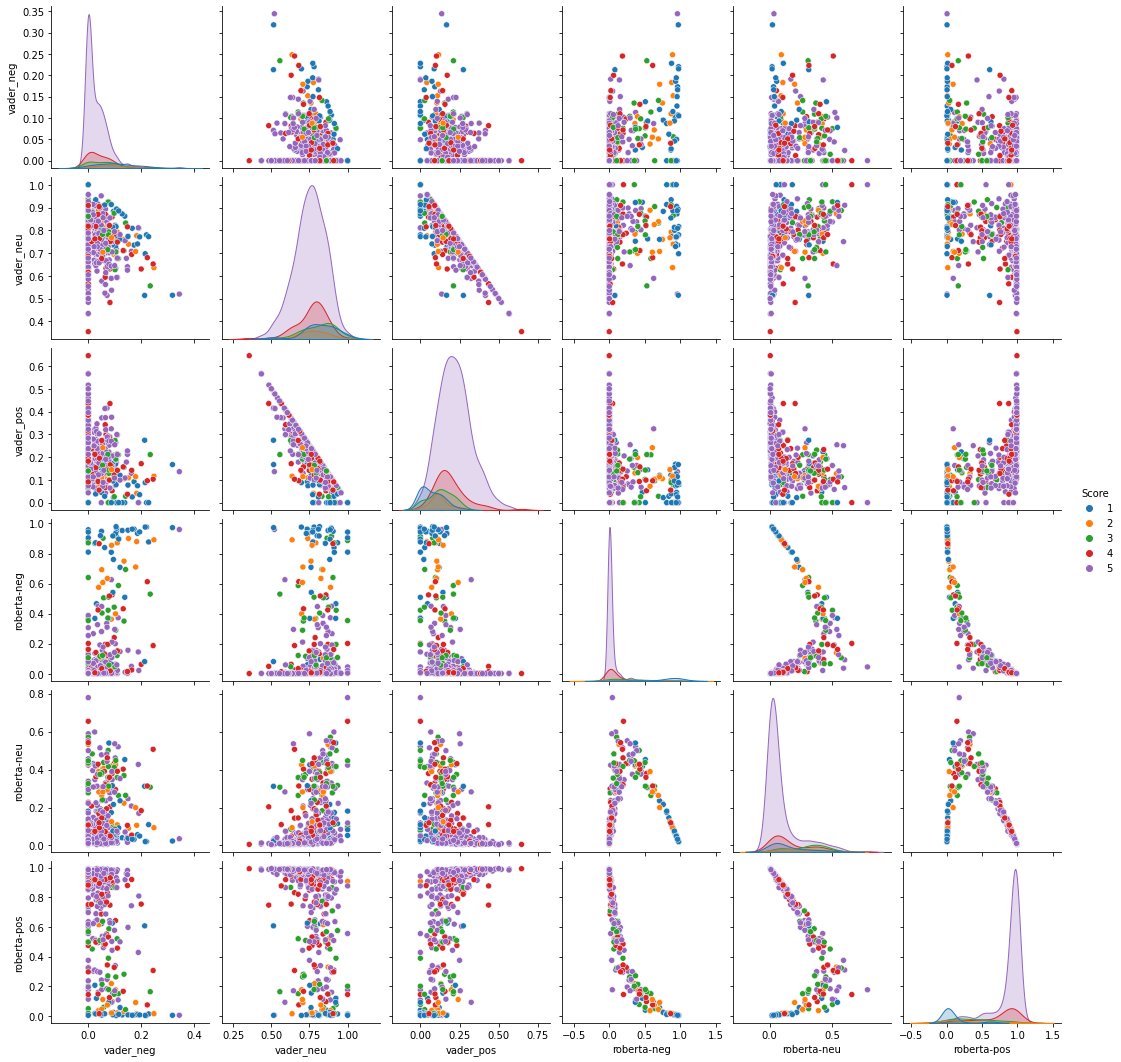

In [107]:
##Compare scores between models
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos','roberta-neg', 'roberta-neu', 'roberta-pos'],
             hue='Score',
             palette='tab10')
plt.show()

In [116]:
results_df.query('Score==5').sort_values('roberta-neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [117]:
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [118]:
from transformers import pipeline
sent_pipeline=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [119]:
sent_pipeline("I love doing sentiment analysis")

[{'label': 'POSITIVE', 'score': 0.999614953994751}]

In [120]:
sent_pipeline("boo")

[{'label': 'NEGATIVE', 'score': 0.9715902209281921}]